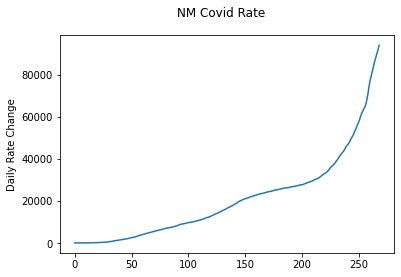

In [39]:
import requests
from returns.pipeline import flow
import numpy as np
import matplotlib.pyplot as plt

data = requests.get('https://api.covidtracking.com/v1/states/nm/daily.json').json()

positive_cases = flow([day["positive"] for day in data], np.flip)
positive_rate = flow([day["positiveIncrease"] for day in data], np.flip)

# positive_rate_before_lockdown = flow([day["positiveIncrease"] for day in data if day["date"] >= 20200601 if day["date"] < 20201116], np.flip)

# positive_rate_after_lockdown = flow([day["positiveIncrease"] for day in data if day["date"] >= 20201116], np.flip)

# ddcb = np.gradient(positive_rate_before_lockdown)
# ddca = np.gradient(positive_rate_after_lockdown)

ddc = np.gradient(positive_rate)

# muddcb = np.average(ddcb)
# muddca = np.average(ddca)

fig, ax1 = plt.subplots(1, 1)
fig.suptitle('NM Covid Rate Delta')

ax1.plot(ddc)
ax2.set_xlabel('Day')
ax1.set_ylabel('Daily Rate Change')

plt.show()
